<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-581723-1694404198/blob/main/Assignment_3_(N_Nitin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. penguins_size.csv is downloaded
2. Load the dataset into tool


N.NITIN
21BCE5165


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


3.1 Perform univariate analysis

In [3]:
from matplotlib import rcParams
import seaborn as sns

<ipython-input-7-176964dae727>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.body_mass_g)


<Axes: xlabel='body_mass_g', ylabel='Density'>

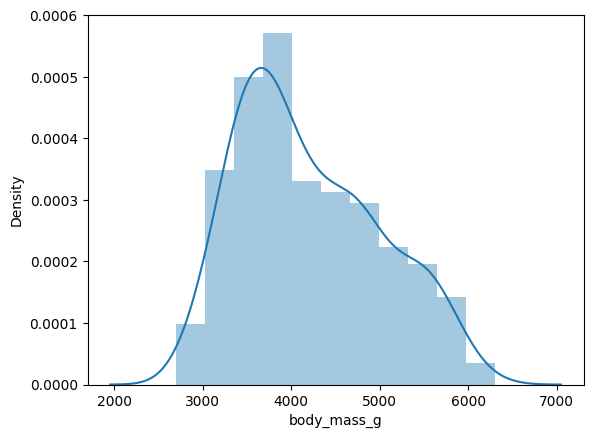

In [7]:
sns.distplot(df.body_mass_g)


3.2 Perform bivariate analysis

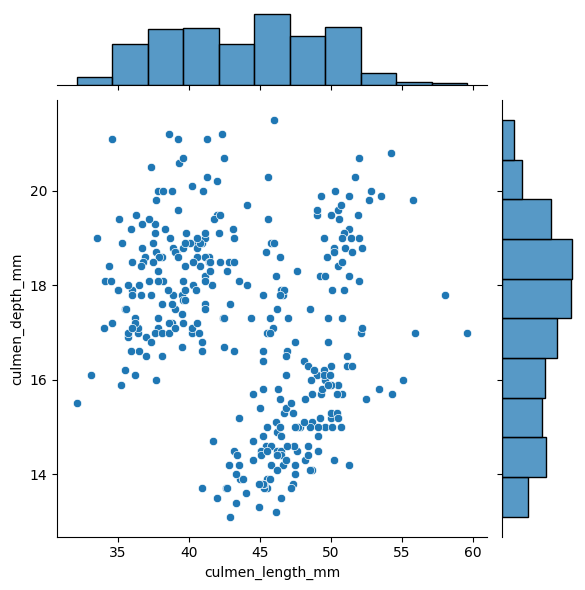

In [8]:
sns.jointplot(x='culmen_length_mm',y='culmen_depth_mm',data=df)

3.3 Perform multivariate analysis

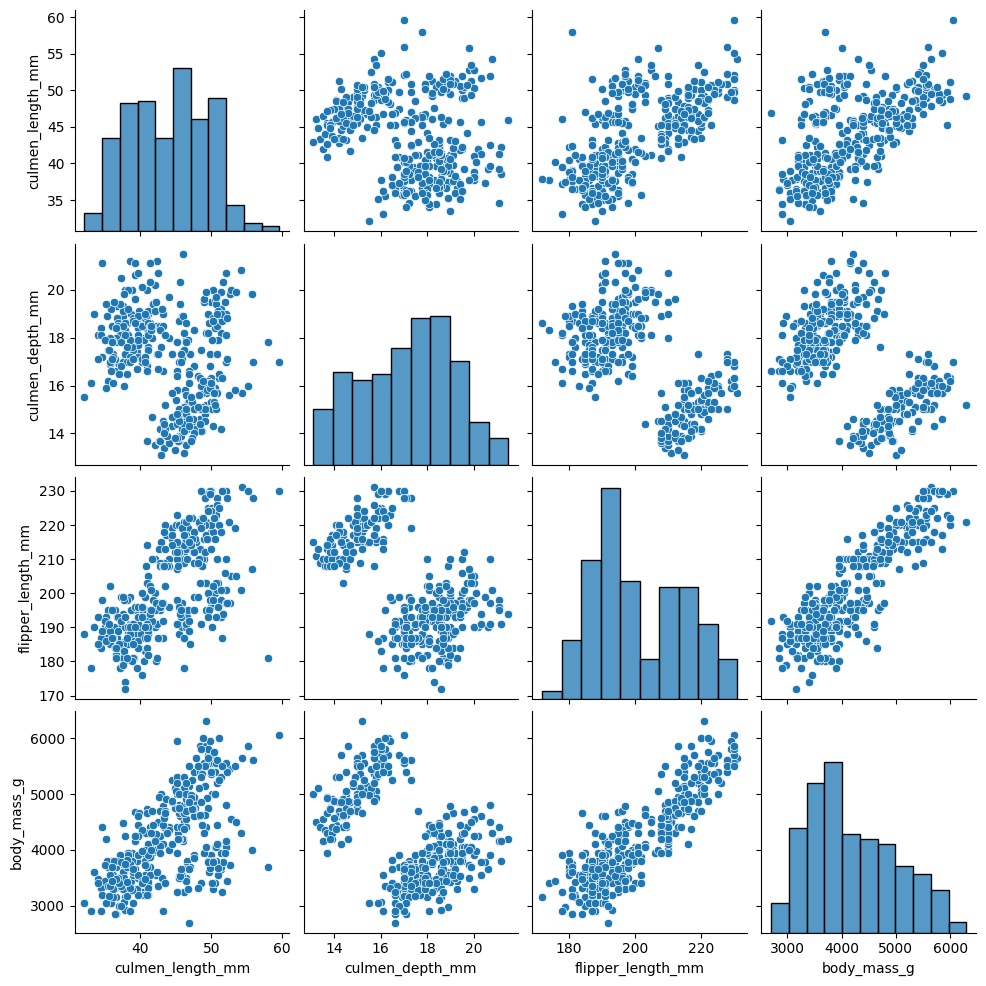

In [9]:
sns.pairplot(df)

4. Perform descriptive statistics on the dataset.

In [10]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


5. Check for Missing values and deal with them.

In [11]:
df.isnull().any() #Checking is there any null values in our dataset

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [12]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [13]:
# Code to replace null values in numerical columns with MEDIAN
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace=True)

# Code to replace null values in categorical column with MODE
df['sex'].fillna(df['sex'].mode().iloc[0],inplace=True)

In [14]:
# Now all null values are replaced with median and mode and dealt properly.

df.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

6. Find the outliers and replace the outliers

<Axes: >

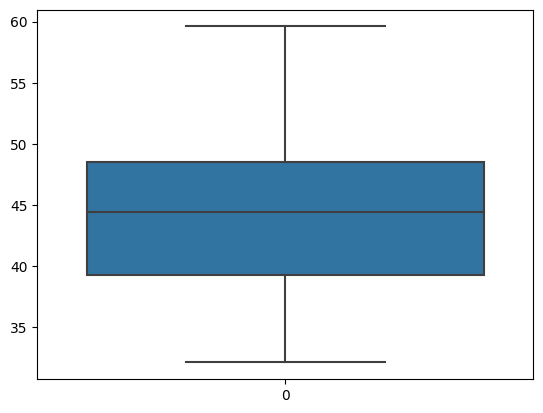

In [15]:
sns.boxplot(df.culmen_length_mm)

<Axes: >

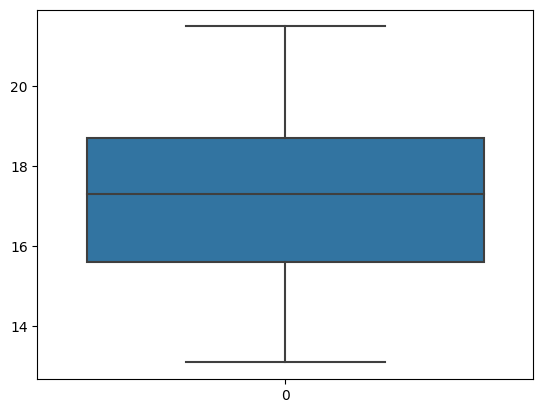

In [16]:
sns.boxplot(df.culmen_depth_mm)

<Axes: >

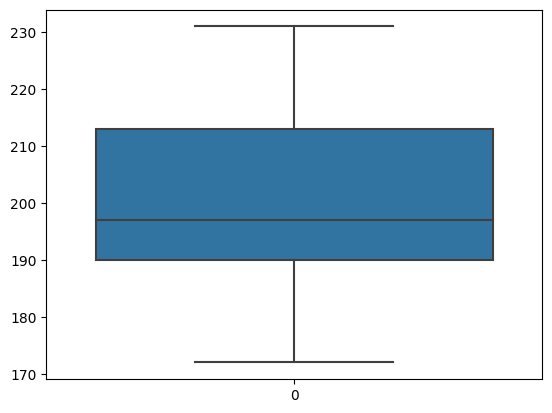

In [17]:
sns.boxplot(df.flipper_length_mm)

<Axes: >

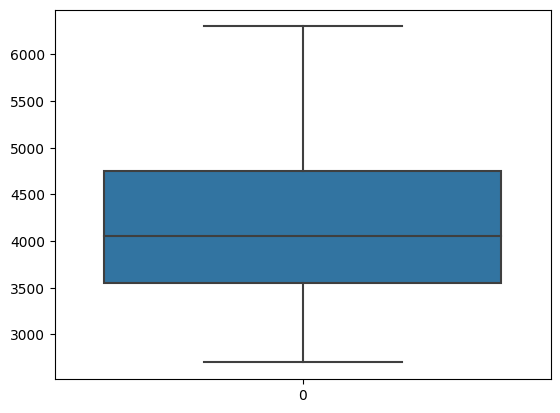

In [18]:
sns.boxplot(df.body_mass_g)

Hence there are no outliers in the dataset.
7. Check for Categorical columns and perform encoding.

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['species'] = le.fit_transform(df['species'])
df['island'] = le.fit_transform(df['island'])
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,2
1,0,2,39.50,17.4,186.0,3800.0,1
2,0,2,40.30,18.0,195.0,3250.0,1
3,0,2,44.45,17.3,197.0,4050.0,2
4,0,2,36.70,19.3,193.0,3450.0,1


8. Check the correlation of independent variables with the target (TARGET IS SPECIES and remaining are independent)

In [20]:
df.corr().species.sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex                 -0.003823
island              -0.635659
culmen_depth_mm     -0.741282
Name: species, dtype: float64

9. Split the data into dependent and independent variables

In [21]:
X=df.drop(columns=['species'],axis=1)
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,2
1,2,39.50,17.4,186.0,3800.0,1
2,2,40.30,18.0,195.0,3250.0,1
3,2,44.45,17.3,197.0,4050.0,2
4,2,36.70,19.3,193.0,3450.0,1


In [22]:
Y=df['species']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

10. Scaling the data

In [23]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.5
2,1.0,0.298182,0.583333,0.389831,0.152778,0.5
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.5


11. Split the data into training and testing


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=0)

12. Check the training and testing data shape.

In [25]:
X_train.shape

(275, 6)

In [26]:
X_test.shape

(69, 6)

In [27]:
Y_train.shape

(275,)

In [28]:
Y_test.shape

(69,)